In [74]:
# import libraries and set plots to be embedded inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import regex as re
from scipy.stats import ttest_ind

import ipywidgets as widgets
from ipywidgets import interact
import plotly.graph_objs as go

%matplotlib inline

In [75]:
# load dataset

df = pd.read_csv("ds_salaries.csv")

In [76]:
# view dataset head

display(df.head())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [77]:
# view dataset info

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


None

The info output above shows the dataset does not have any missing data

#### We would be using the salary_in_usd column for the analysis of salaries. As a result, the salary and salary_currency columns can be dropped

In [80]:
# drop irrelevant columns

df.drop(['salary','salary_currency'], axis = 1, inplace = True)
display(df)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [81]:
# view count distribution of job title column

df['job_title'].value_counts()

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

In [82]:
# clean job titles with regex

df['job_title'] = df['job_title'].replace(r'.*(Scientist|Science).*', 'Data Scientist', regex=True)

df['job_title'] = df['job_title'].replace(r'.*(Analyst|Analytics).*', 'Data Analyst', regex=True)

df['job_title'] = df['job_title'].replace(r'.*(Data.* Engineer|ETL).*', 'Data Engineer', regex=True)

df['job_title'] = df['job_title'].replace(r'.*(ML.* Engineer|Machine Learning).*', 'Machine Learning Engineer', regex=True)

df['job_title'] = df['job_title'].replace(r'.*(Data Architect).*', 'Data Architect', regex=True)

In [83]:
# view updated count distribution of job title column

df['job_title'].value_counts()

job_title
Data Scientist                       1181
Data Engineer                        1101
Data Analyst                          821
Machine Learning Engineer             375
Data Architect                        105
Research Engineer                      37
Data Manager                           29
Computer Vision Engineer               18
Data Specialist                        14
BI Developer                           13
AI Developer                           11
Head of Data                           10
NLP Engineer                            7
Deep Learning Engineer                  6
Computer Vision Software Engineer       5
3D Computer Vision Researcher           4
Business Intelligence Engineer          4
Data Strategist                         2
Data Modeler                            2
Autonomous Vehicle Technician           2
AI Programmer                           2
Data Lead                               2
Data Management Specialist              1
Deep Learning Researcher

In [84]:
# since autonomous vehicle techincian is not a data science related job title, those rows would be dropped

df.drop(df[df['job_title'] == 'Autonomous Vehicle Technician'].index, inplace = True)

In [85]:
# create list of major job titles

major_jobs = df['job_title'].value_counts()[:5].index

In [86]:
# replace job titles not among the main job titles with 'Others'

df['job_title'] = df['job_title'].apply(lambda x: x if x in major_jobs else 'Others')

In [87]:
# view updated count distribution of job title column

df['job_title'].value_counts()

job_title
Data Scientist               1181
Data Engineer                1101
Data Analyst                  821
Machine Learning Engineer     375
Others                        170
Data Architect                105
Name: count, dtype: int64

In [88]:
#creates a new column with the converted currency using the most recent exchange rate(2/5/2025)
df['salary_in_cad'] = df['salary_in_usd'] * 1.43


In [89]:
#drops the USD column as it is no longer necessary
df.drop(['salary_in_usd'], axis = 1, inplace = True) 


In [90]:
#display updated data frame
display(df)

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_in_cad
0,2023,SE,FT,Data Scientist,ES,100,ES,L,122761.21
1,2023,MI,CT,Machine Learning Engineer,US,100,US,S,42900.00
2,2023,MI,CT,Machine Learning Engineer,US,100,US,S,36465.00
3,2023,SE,FT,Data Scientist,CA,100,CA,M,250250.00
4,2023,SE,FT,Data Scientist,CA,100,CA,M,171600.00
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,US,100,US,L,589160.00
3751,2021,MI,FT,Data Scientist,US,100,US,L,215930.00
3752,2020,EN,FT,Data Scientist,US,100,US,S,150150.00
3753,2020,EN,CT,Data Analyst,US,100,US,L,143000.00


In [91]:
#changing the data type of the remote_ratio column 
# df = df.astype({'remote_ratio':'object'})

In [92]:
#creating a new column that interprets the remote ratio as In-Person, Hybrid or Fully Remote
df['remote_status'] = df['remote_ratio'].replace({0:'In-Person', 50:'Hybrid', 100:'Fully Remote'})

In [93]:
#displaying the updated data frame
display(df)

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_in_cad,remote_status
0,2023,SE,FT,Data Scientist,ES,100,ES,L,122761.21,Fully Remote
1,2023,MI,CT,Machine Learning Engineer,US,100,US,S,42900.00,Fully Remote
2,2023,MI,CT,Machine Learning Engineer,US,100,US,S,36465.00,Fully Remote
3,2023,SE,FT,Data Scientist,CA,100,CA,M,250250.00,Fully Remote
4,2023,SE,FT,Data Scientist,CA,100,CA,M,171600.00,Fully Remote
...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,US,100,US,L,589160.00,Fully Remote
3751,2021,MI,FT,Data Scientist,US,100,US,L,215930.00,Fully Remote
3752,2020,EN,FT,Data Scientist,US,100,US,S,150150.00,Fully Remote
3753,2020,EN,CT,Data Analyst,US,100,US,L,143000.00,Fully Remote


In [94]:
df = df[(df['company_location'] == 'US') | (df['company_location'] == 'CA')] 

In [95]:
# Calculate Q1 and Q3
Q1 = df['salary_in_cad'].quantile(0.25)
Q3 = df['salary_in_cad'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Identify outliers
outliers = df[(df['salary_in_cad'] < lower_bound) | (df['salary_in_cad'] > upper_bound)]
print(f"Number of outliers in Fare: {outliers.shape[0]}")



Q1: 161447.0
Q3: 264550.0
IQR: 103103.0
Lower Bound: 6792.5
Upper Bound: 419204.5
Number of outliers in Fare: 60


In [96]:
#Displaying the outliers 
outliers['salary_in_cad'].sort_values(ascending = False)

3522    643500.0
3747    604890.0
3675    594880.0
3750    589160.0
3463    579150.0
1288    550550.0
3468    543400.0
649     537794.4
2359    536250.0
1258    536250.0
1105    529100.0
1311    529100.0
478     505076.0
2374    500500.0
1421    500500.0
2555    494208.0
33      490218.3
133     489489.0
845     486200.0
228     471185.0
3697    464750.0
3410    463320.0
1116    462319.0
145     455169.0
1286    455169.0
488     453410.1
2406    450450.0
1396    449163.0
1007    443300.0
1722    443300.0
2279    443300.0
1932    443300.0
1427    443300.0
860     443300.0
1153    443300.0
163     442442.0
68      442442.0
358     434720.0
1099    429343.2
1097    429343.2
1593    429000.0
190     429000.0
3152    429000.0
2856    429000.0
2670    429000.0
2502    429000.0
2331    429000.0
2162    429000.0
1458    429000.0
1605    429000.0
687     428285.0
2281    428285.0
793     428285.0
1131    428285.0
1558    428285.0
2832    425425.0
716     425139.0
482     425139.0
1677    425139

These values appear as outliers because the data is left skewed

In [98]:
bar = go.Histogram()
fig_bar = go.FigureWidget(data=bar)

@interact(year=[2020, 2021, 2022, 2023])
def update_bar(year=2023):
    data = df[df['work_year'] == year]['salary_in_cad']
    fig_bar.update_traces(
                          x=data, nbinsx = 100)
    fig_bar.update_layout(title_text="Salary Distribution {0}".format(year))

fig_bar

interactive(children=(Dropdown(description='year', index=3, options=(2020, 2021, 2022, 2023), value=2023), Out…

FigureWidget({
    'data': [{'nbinsx': 100,
              'type': 'histogram',
              'uid': 'ad96b6ce-13a1-4d1c-a585-f03c7088bfaa',
              'x': array([ 42900.,  36465., 250250., ..., 128700., 228800., 193050.])}],
    'layout': {'template': '...', 'title': {'text': 'Salary Distribution 2023'}}
})

In [99]:
fig, ax = plt.subplots(3, 1, figsize=(15, 12))

ax[0].hist(df[df['company_size'] == 'L']['salary_in_cad']);
ax[1].hist(df[df['company_size'] == 'M']['salary_in_cad']);
ax[2].hist(df[df['company_size'] == 'S']['salary_in_cad']);

In [100]:
plt.figure(figsize=(12, 8))
sns.countplot(data = df, x = 'work_year', hue = 'remote_status')
plt.xlabel('Year')
plt.legend(title = 'Remote Status')
plt.show()

#### What are the proportions of employment types in the Data Science field?

In [102]:
freq = df['employment_type'].value_counts()

# Get the indexes of the Series
title_order = freq.index

plt.figure(figsize=(10, 6))

sns.countplot(data = df, x = 'employment_type', order = title_order)
plt.xticks(rotation = 75)
plt.xlabel('Employment Type')
plt.show()

In [103]:
experience_count = df['experience_level'].value_counts()
experience_count

experience_level
SE    2323
MI     512
EN     190
EX     102
Name: count, dtype: int64

In [104]:
experience_count.values

array([2323,  512,  190,  102], dtype=int64)

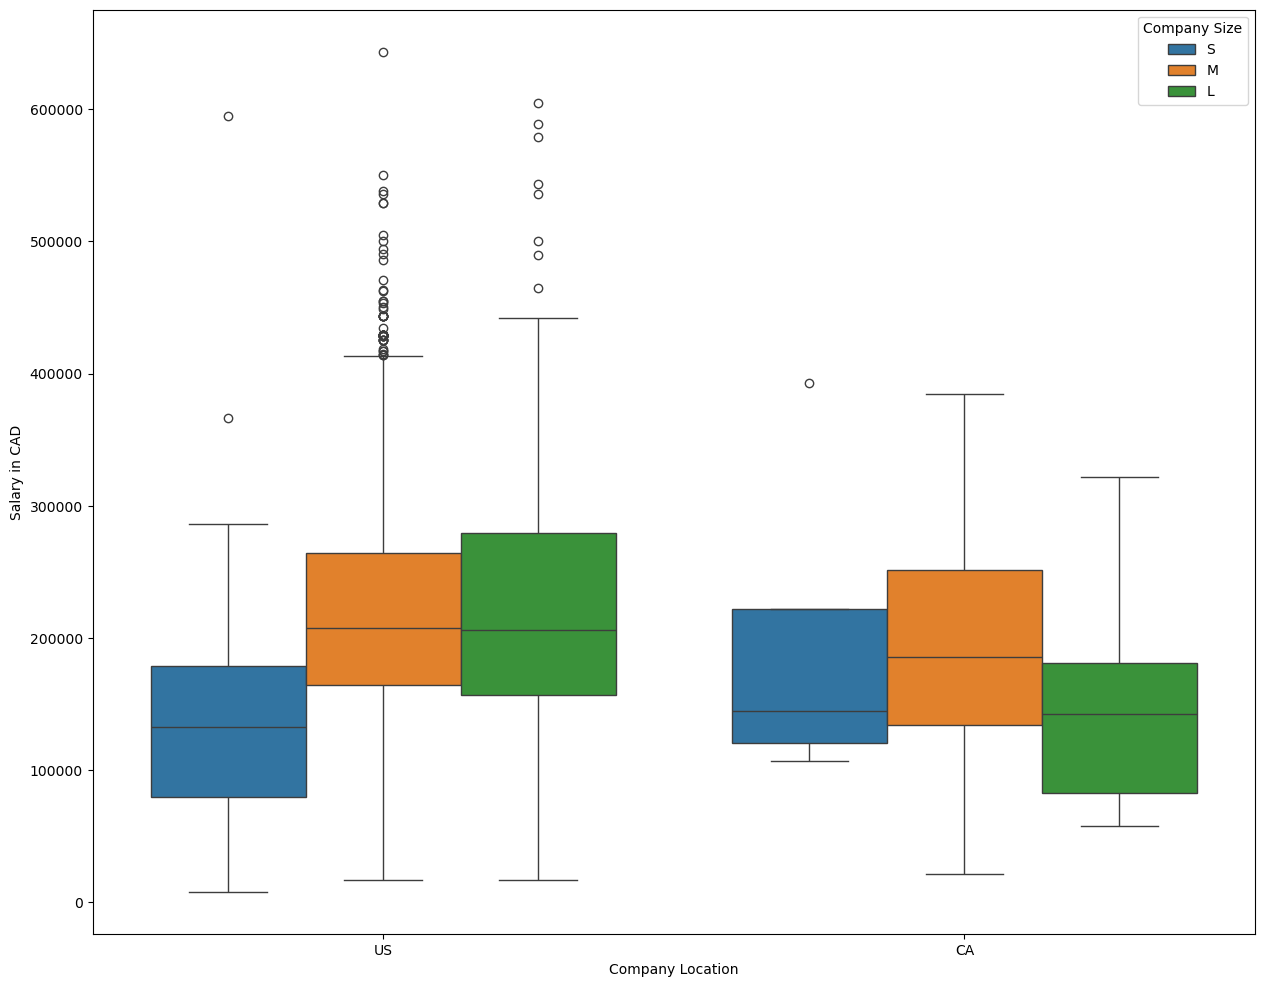

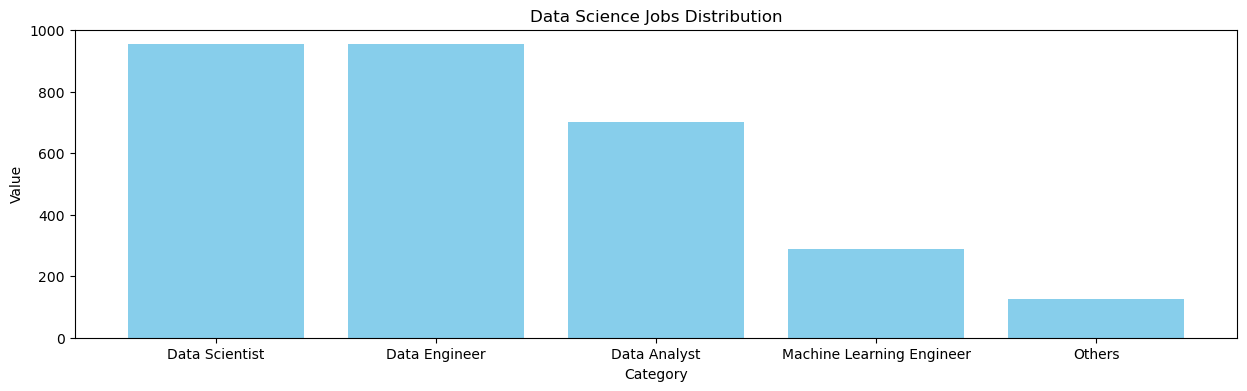

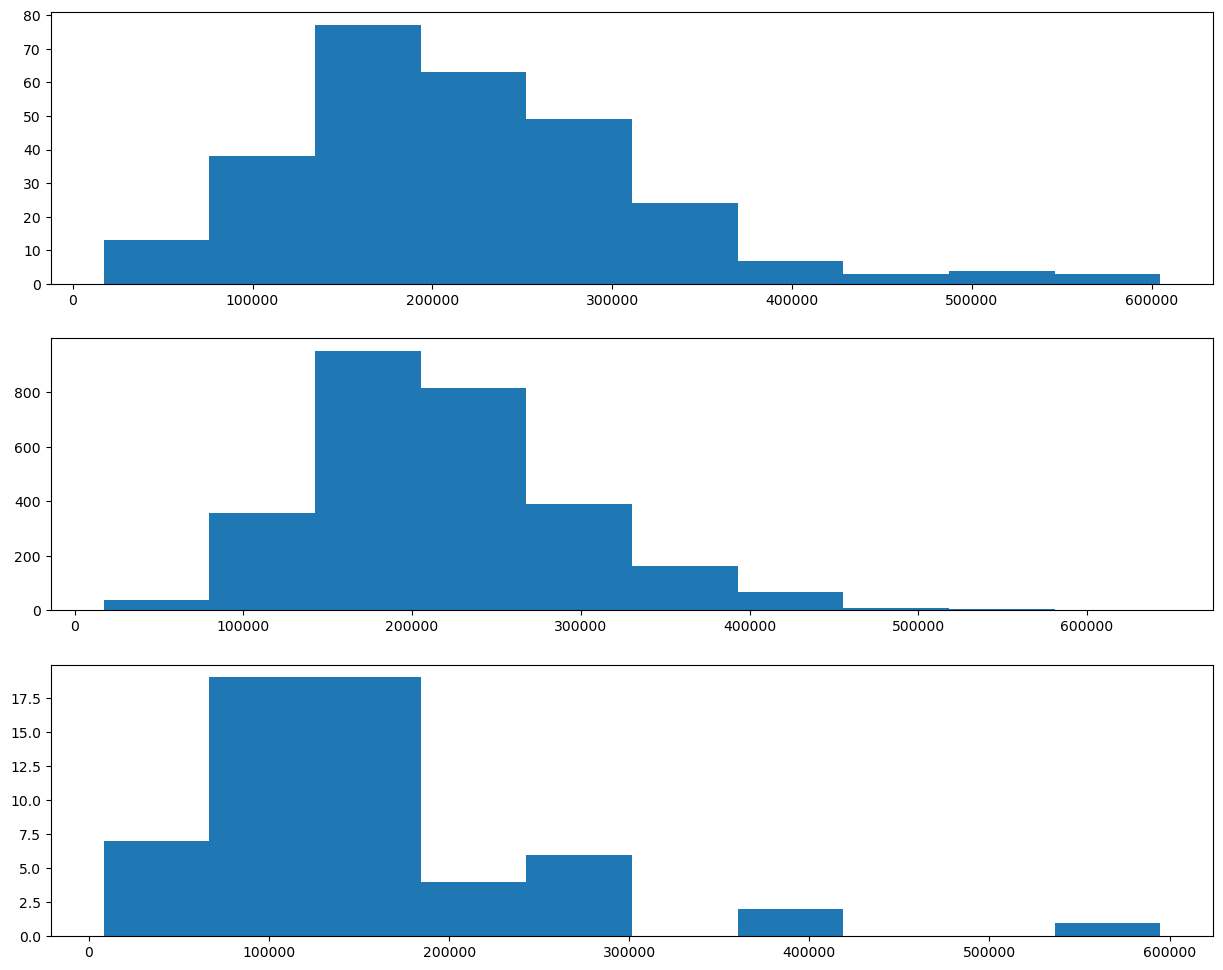

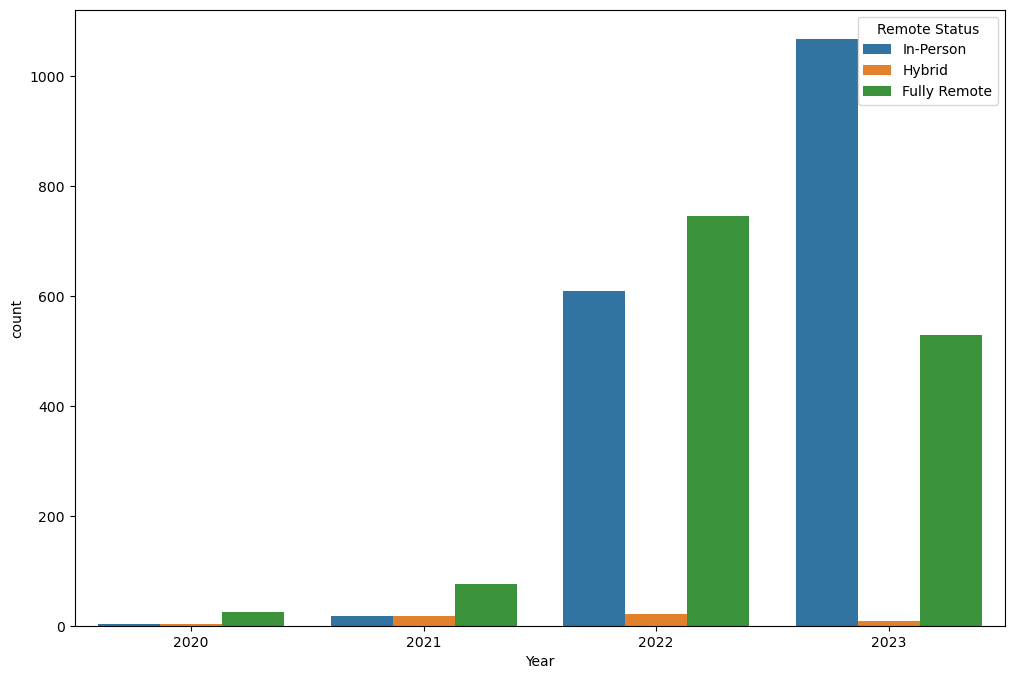

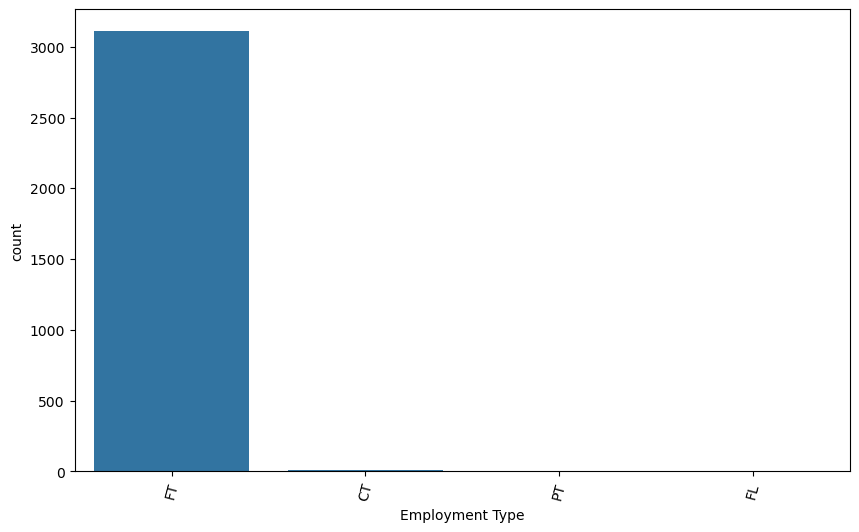

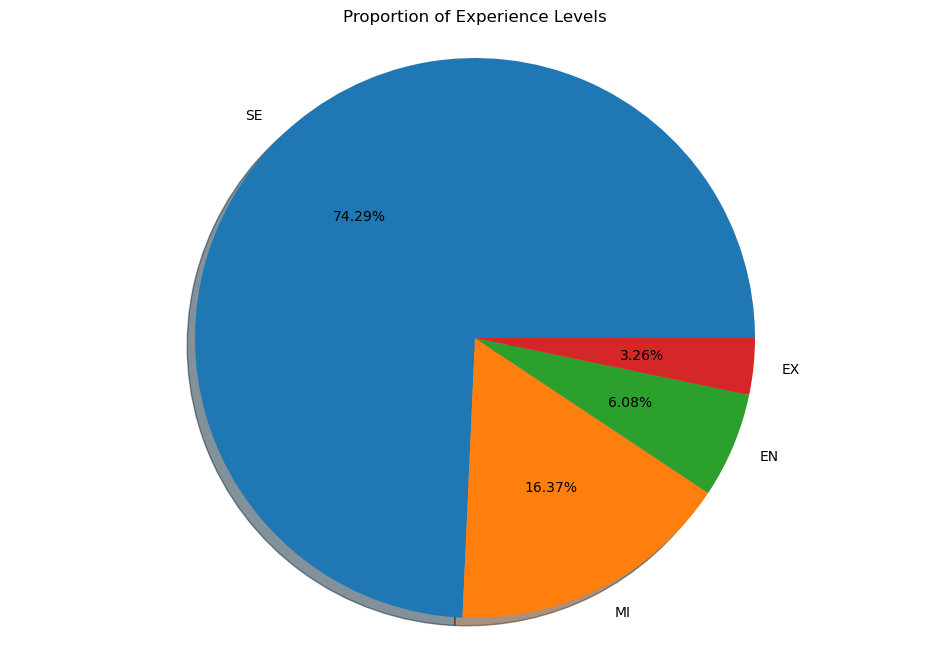

In [105]:
plt.figure(figsize=(12, 8))
plt.pie(experience_count.values, labels = experience_count.index, autopct='%1.2f%%', shadow=True)
plt.title("Proportion of Experience Levels")
plt.axis('equal')
plt.show()

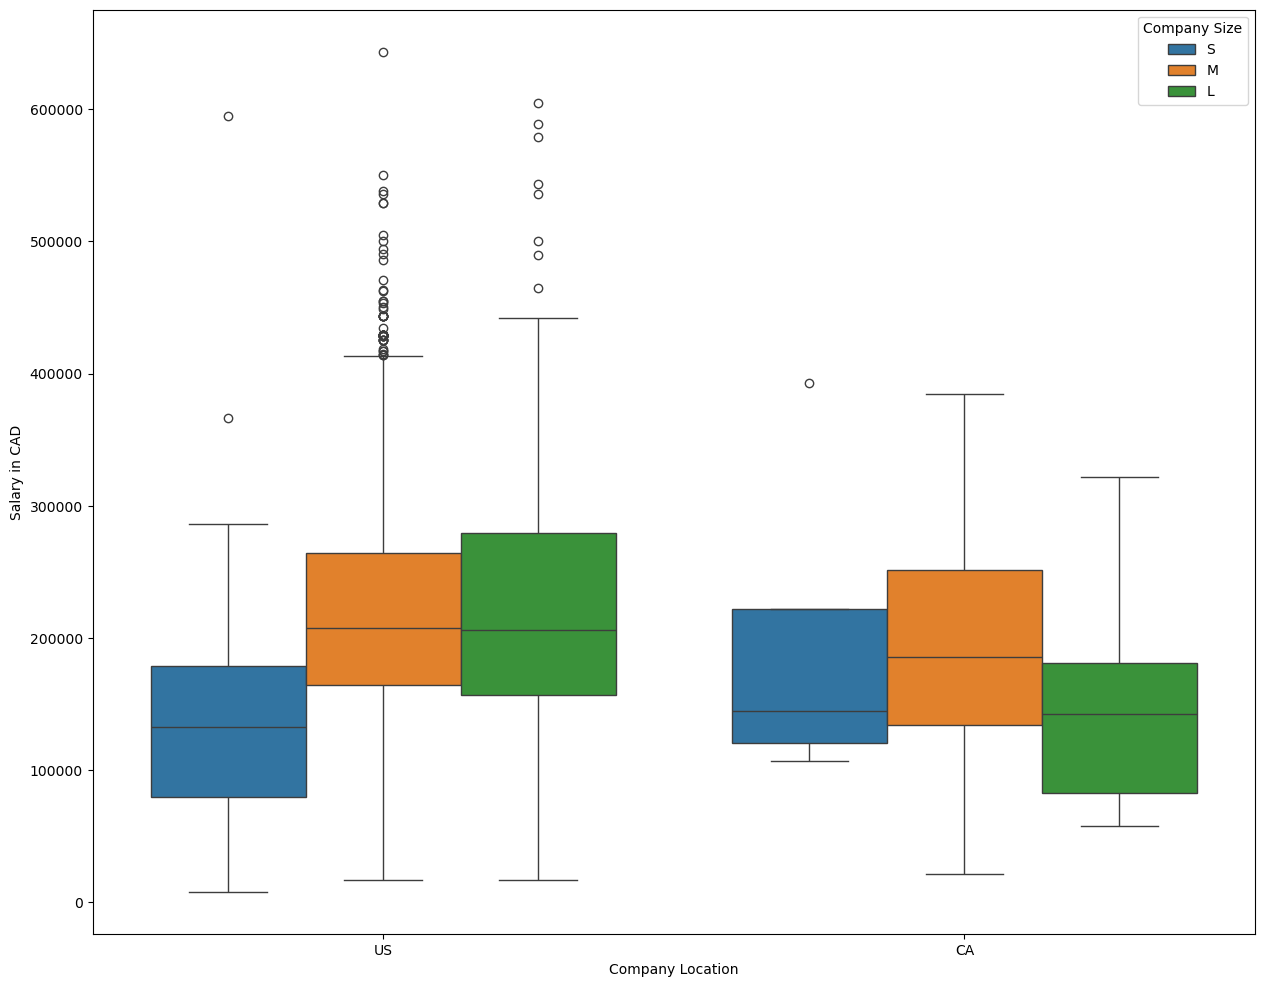

In [106]:
plt.figure(figsize=(15, 12))
sns.boxplot(data=df, x='company_location', y='salary_in_cad', hue = 'company_size')
plt.xlabel('Company Location')
plt.ylabel('Salary in CAD')
plt.legend(title = 'Company Size')
plt.show()

#### Hypothesis Testing

In [108]:
# define function to compute the t-test of salaries between job titles using a significance level of 0.05

def ttest(df, type1, type2, salary_in_cad):
  df1 = df[df['job_title'] == type1]
  df2 = df[df['job_title'] == type2]

  #determine the pvalue of the t-test

  test = ttest_ind(df1[salary_in_cad], df2[salary_in_cad])

  print('The pvalue of the t-test is: {}'.format(test.pvalue))

  if test.pvalue < 0.05:
    return('There is a significant difference between the salaries of {} and {}'.format(type1, type2))
  else:
    return('There is no significant difference between the salaries of {} and {}'.format(type1, type2))

In [109]:
# run the function on Data Scientist and Data Analyst salaries

ttest(df, 'Data Scientist', 'Data Analyst', 'salary_in_cad')

The pvalue of the t-test is: 7.572135527508366e-56


'There is a significant difference between the salaries of Data Scientist and Data Analyst'

In [110]:
#finding the top 5 data science industry positions
job_total = df['job_title'].value_counts()

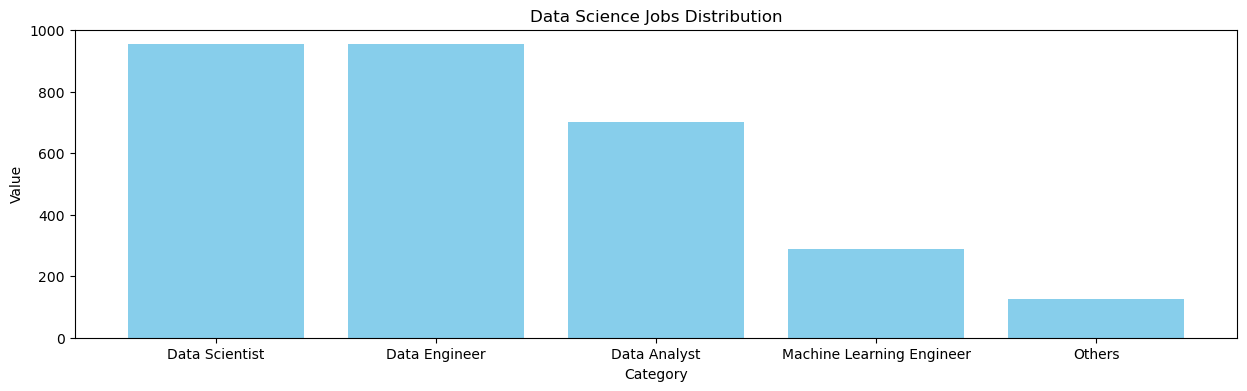

In [111]:
#creating a bar chart that shows the distribution of job titles 

plt.figure(figsize=(15, 4))
plt.bar(job_total[:5].index, job_total[:5].values, color='skyblue')
plt.title("Data Science Jobs Distribution")
plt.xlabel("Category")
plt.ylabel("Value")
plt.show()


In [ ]:
#creating a line plot to show the growth of the data science field over the past four years

growth_rate = df['work_year'].value_counts()
plt.figure(figsize=(6,4))
plt.plot(growth_rate.index,growth_rate.values)
plt.xticks(growth_rate.index)
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.title('Data Science Jobs Rate Change (2020-2023)')
plt.show()